In [1]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    Then renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
sns.set_style("ticks")

CONF_ID = "param__header__all__config_id"

df01 = pd.read_csv("/home/idli/results/analysis/result_ec_metrics_full.csv")

mapping01 = {
    "param__func__mp.input__cmd_start": "size",
    #"param__func__de.upb.lb-traefik.0.1__cpu_bw": "cpu_bw",
    #"param__func__de.upb.lb-traefik.0.1__mem_max": "mem",
    "param__func__de.upb.lb-traefik.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.lb-traefik.0.1__mem_max": "mem",
    "metric__mp.input.vdu01.0__ab_request_per_second": "requests_per_second",
    "metric__mp.input.vdu01.0__ab_completed_requests": "completed_requests",
    "metric__mp.input.vdu01.0__ab_failed_requests": "failed_requests",
    "metric__mp.input.vdu01.0__ab_html_transfer_byte": "html_transfer_byte",
    "metric__mp.input.vdu01.0__ab_mean_time_per_request": "mean_time_per_request",
    "metric__mp.input.vdu01.0__ab_total_transfer_byte": "total_transfer_byte",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "transfer_rate_kbyte_per_second",
}


df01 = select_and_rename(df01, mapping01)
#df02 = select_and_rename(df02, mapping02)
#df03 = select_and_rename(df03, mapping03)

df01["vnf"] = "traefik"
#df02["vnf"] = "tested haproxy"
#df03["vnf"] = "nginx with 1 server"

#df02["ids"] = "snort2"

df_list = [df01]
#df.reset_index(inplace=True)
# clear the data
for df in df_list:
    #df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i http://20.0.0.254:8888/", "haproxy1")
    #df["size"] = df["size"].str.replace("ab -c 9999 -r -t 60 -n 99999999 -e /tngbench_share/ab_logs2.csv -s 60 -k -X 20.10.0.2:3128 http://40.0.0.254:80/", "squid")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 9999 -e /tngbench_share/ab_logs.csv -s 60 -k -i http://20.0.0.254:80/", "2")
    print(df.head())
    print("---")

df_combined = pd.concat(df_list)

/home/idli/project/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


  size  cpu_bw  mem  requests_per_second  completed_requests  failed_requests  \
0    2     0.3  256               425.84                9999                0   
1    2     0.3  256               421.83                9999                0   
2    2     0.3  256               412.97                9999                0   
3    2     0.3  256               418.91                9999                0   
4    2     0.3  256               411.86                9999                0   

   html_transfer_byte  mean_time_per_request  total_transfer_byte  \
0                   0                  2.348              2749725   
1                   0                  2.371              2749725   
2                   0                  2.421              2749725   
3                   0                  2.387              2749725   
4                   0                  2.428              2749725   

   transfer_rate_kbyte_per_second      vnf  
0                          114.36  traefik  
1       

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
df01.shape

(1920, 11)

In [4]:
#df01= df01.dropna()
#df01 = df01.fillna(df01.mean())
X =  df01['cpu_bw'].values.reshape(-1,1)
y =  df01['requests_per_second'].values.reshape(-1,1)

In [5]:
train_Xset, X_testset, train_Yset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
regressor = LinearRegression()  
regressor.fit(train_Xset, train_Yset)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print(regressor.intercept_)

[143.85081004]


In [8]:
print(regressor.coef_)

[[1110.4745988]]


In [9]:
prediction1 = regressor.predict(X_testset)

In [10]:
df = pd.DataFrame({'Actual': y_testset.flatten(), 'Predicted': prediction1.flatten()})
df1 = df.head(25)
df1

,Actual,Predicted
0,556.17,588.040650
1,1134.37,1143.277949
2,1116.26,1032.230489
3,1144.38,1143.277949
4,572.43,588.040650
5,566.60,588.040650
6,412.42,476.993190
7,842.42,810.135569
8,417.27,476.993190
9,413.20,476.993190


In [11]:
mae_LR =  metrics.mean_absolute_error(y_testset, prediction1)
mse_LR =  metrics.mean_squared_error(y_testset, prediction1) 
r_LR= np.sqrt(metrics.mean_squared_error(y_testset, prediction1))

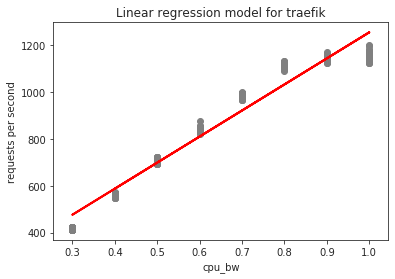

In [12]:
plt.scatter(X_testset, y_testset,  color='gray')
plt.plot(X_testset, prediction1, color='red', linewidth=2)
plt.title('Linear regression model for traefik')  
plt.ylabel('requests per second')  
plt.xlabel('cpu_bw')
plt.savefig("/home/idli/results/analysis/plots/prediction.png")

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 2000, random_state = 0) 
regressor1.fit(train_Xset,train_Yset.ravel())   
prediction2 = regressor1.predict(X_testset)

In [14]:
df_rf = pd.DataFrame({'Actual': y_testset.flatten(), 'Predicted': prediction2.flatten()})
df2 = df_rf.head(25)
df2

,Actual,Predicted
0,556.17,562.013529
1,1134.37,1146.042028
2,1116.26,1115.636447
3,1144.38,1146.042028
4,572.43,562.013529
5,566.60,562.013529
6,412.42,419.010711
7,842.42,846.293841
8,417.27,419.010711
9,413.20,419.010711


In [15]:
mae_RF =  metrics.mean_absolute_error(y_testset, prediction2)
mse_RF =  metrics.mean_squared_error(y_testset, prediction2)
r_RF =  np.sqrt(metrics.mean_squared_error(y_testset, prediction2))

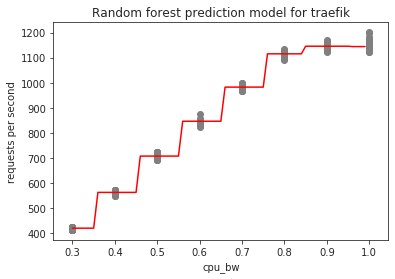

In [16]:
x_grid=np.arange(min(X),max(X),0.01)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(X_testset, y_testset,  color='gray')
plt.plot(x_grid, regressor1.predict(x_grid), color='red')
plt.title('Random forest prediction model for traefik')  
plt.ylabel('requests per second')  
plt.xlabel('cpu_bw')
plt.savefig("/home/idli/results/analysis/plots/prediction_randomforest.png")

In [17]:
from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
regressor_lin = SVR(kernel='linear', C=100, gamma='auto')
regressor_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
y_rbf = regressor_rbf.fit(train_Xset, train_Yset.ravel())
prediction_rbf = regressor_rbf.predict(X_testset)
y_lin = regressor_lin.fit(train_Xset, train_Yset.ravel())
prediction_lin = regressor_lin.predict(X_testset)
y_poly = regressor_poly.fit(train_Xset, train_Yset.ravel())
prediction_poly = regressor_poly.predict(X_testset)

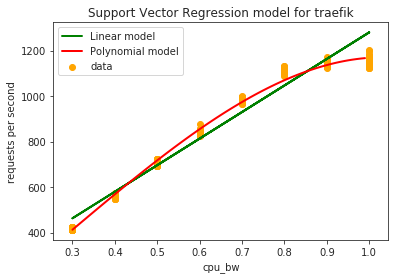

In [18]:
x_grid1=np.arange(min(X),max(X),0.01)
x_grid1=x_grid1.reshape((len(x_grid1),1))
lw = 2
plt.scatter(X_testset, y_testset, color='orange', label='data')
#plt.hold('on')
#plt.plot(X_testset, prediction_rbf, color='blue', lw=lw, label='RBF model')
plt.plot(X_testset, prediction_lin, color='green', lw=lw, label='Linear model')
plt.plot(x_grid1, regressor_poly.predict(x_grid1), color='red',lw=lw, label='Polynomial model')
#plt.plot(X_testset, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('cpu_bw')
plt.ylabel('requests per second')
plt.title('Support Vector Regression model for traefik')
plt.legend()
plt.savefig("/home/idli/results/analysis/plots/prediction_svr.png")

In [19]:
#mae_RBF =  metrics.mean_absolute_error(y_testset, prediction_rbf)
#mse_RBF =  metrics.mean_squared_error(y_testset, prediction_rbf)
#r_RBF =  np.sqrt(metrics.mean_squared_error(y_testset, prediction_rbf))
mae_LIN =  metrics.mean_absolute_error(y_testset, prediction_lin)
mse_LIN =  metrics.mean_squared_error(y_testset, prediction_lin)
r_LIN =  np.sqrt(metrics.mean_squared_error(y_testset, prediction_lin))
mae_poly =  metrics.mean_absolute_error(y_testset, prediction_poly)
mse_poly =  metrics.mean_squared_error(y_testset, prediction_poly)
r_poly =  np.sqrt(metrics.mean_squared_error(y_testset, prediction_poly))     

In [20]:
summary2 = {
        'Regression_method': ['LR','LR','LR','RF','RF','RF','SVR_LIN','SVR_LIN','SVR_LIN','SVR_POLY','SVR_POLY','SVR_POLY'],
        'Metric': ['MAE','MSE','RMSE','MAE','MSE','RMSE','MAE','MSE','RMSE','MAE','MSE','RMSE'],
        'values': [mae_LR, mse_LR,r_LR, mae_RF,mse_RF, r_RF, mae_LIN,mse_LIN, r_LIN, mae_poly,mse_poly,r_poly]
        }
df_summary = pd.DataFrame(summary2)
print(df_summary)

   Regression_method Metric       values
0                 LR    MAE    49.944749
1                 LR    MSE  3675.081200
2                 LR   RMSE    60.622448
3                 RF    MAE     7.484562
4                 RF    MSE   101.356875
5                 RF   RMSE    10.067615
6            SVR_LIN    MAE    48.294304
7            SVR_LIN    MSE  3788.609936
8            SVR_LIN   RMSE    61.551685
9           SVR_POLY    MAE    16.571688
10          SVR_POLY    MSE   505.863767
11          SVR_POLY   RMSE    22.491415


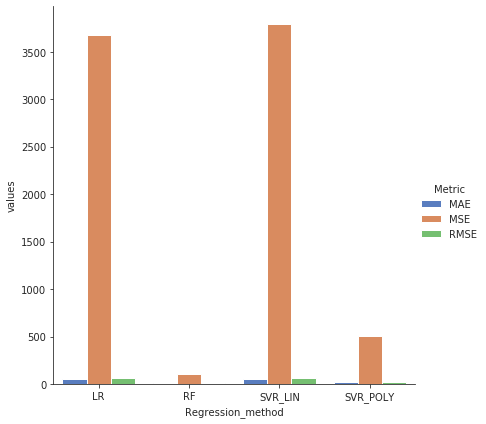

In [21]:
#df_summary = df.reset_index()
g= sns.catplot(x="Regression_method", y="values", hue="Metric", data=df_summary,
                height=6, kind="bar", palette="muted")
#plt.title('Comparison of regression methods')  
plt.savefig("/home/idli/results/analysis/plots/comparison.png")

In [22]:
# Since random forest makes the best prediction, here you can make a prediction for available cpu bandwidth
X_new = [[input("Enter the available cpu bw: ")]] 

predict = regressor1.predict(X_new)
print("Approx. number of requests served per second by traefik: ", predict)

Enter the available cpu bw: 0.6
Approx. number of requests served per second by traefik:  [846.29384108]
